---

# DoH

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch import nn

from time import time
from tqdm import tqdm

from sklearn.metrics import roc_auc_score, average_precision_score,auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.utils import shuffle

import pandas as pd
import os
import sys

seed = 1234
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

os.environ['CUDA_VISIBLE_DEVICES'] = '2'

device = torch.device('cuda' if (torch.cuda.is_available()) else 'cpu')

from load_data import get_DoH
from model_ganomaly import GANomaly

In [2]:
def meanAUC_PRAUC(auc_list, pr_list, name):
    print('AUC:')
    print(auc_list)
    print('**************')
    print('PR AUC:')
    print(pr_list)
    print('**************')
    
    
    AUC_Frame = pd.DataFrame(auc_list, columns = [name])
    PR_AUC_Frame = pd.DataFrame(pr_list, columns = [name])
    
    AUC_Frame.to_csv(f'./auc/{name}.csv', index=False)
    PR_AUC_Frame.to_csv(f'./auc_PR/{name}.csv', index=False)
    
    AUC_Frame = list(AUC_Frame[name])

    N = len(AUC_Frame)
    mean_auc = np.mean(AUC_Frame)
    std_auc = np.std(AUC_Frame)
    std_error = std_auc / (np.sqrt(N))

    ci = 1.96 * std_error
    lower_bound = mean_auc - ci
    upper_bound = mean_auc + ci
    
    print('AUC')
    print(f'{mean_auc:.2f} +/- {ci:.2f}')
    print(f'95% confidence level, average auc would be between {lower_bound:.2f} and {upper_bound:.2f}')
    print('**************')
    
    PR_AUC_Frame = list(PR_AUC_Frame[name])

    N = len(PR_AUC_Frame)
    mean_auc = np.mean(PR_AUC_Frame)
    std_auc = np.std(PR_AUC_Frame)
    std_error = std_auc / (np.sqrt(N))

    ci = 1.96 * std_error
    lower_bound = mean_auc - ci
    upper_bound = mean_auc + ci
    
    print('PR AUC')
    print(f'{mean_auc:.2f} +/- {ci:.2f}')
    print(f'95% confidence level, average auc would be between {lower_bound:.2f} and {upper_bound:.2f}')

In [3]:
batch_size = 1024

WORK_SPACE = '../Dataset'
DATASET_AREA = 'CIRA-CIC-DoHBrw-2020'

FILE_3 = 'l2-benign.csv'
FILE_4 = 'l2-malicious.csv'

DATASET = 'DoH'

PATH_B = os.path.join(WORK_SPACE, DATASET_AREA, FILE_3)
PATH_M = os.path.join(WORK_SPACE, DATASET_AREA, FILE_4)

In [4]:
dataset = get_DoH(PATH_B, PATH_M, seed, show=True)

19807 normal records, 249836 anormal records
We use 124918 anomalous records
-----------------------------------------------------------------------------------------
There are 15846 records in training set
Training set is composed by 15846 normal records and 0 abnormal records
-----------------------------------------------------------------------------------------
There are 7236 records in validation set
Validation set is composed by 990 normal records and 6246 abnormal records
-----------------------------------------------------------------------------------------
There are 21709 records in test set
Test set is composed by 2971 normal records and 18738 abnormal records


In [5]:
args = {}
nc = dataset['x_train'].shape[1]
nz = 100
manualseed = -1
print_freq = 100
args['w_adv'] = 1
args['w_con'] = 50
args['w_enc'] = 1
isTrain = True 

#### Mean AUC and standard deviation after seven runs

Iteration: 1
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.027 | g_loss: 0.3791
[INFO] Training phase... Elapsed time: 372 seconds



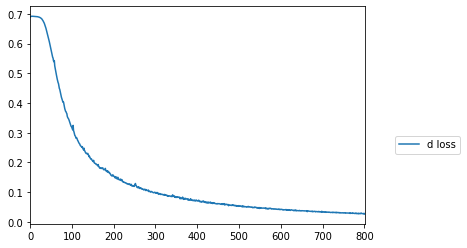

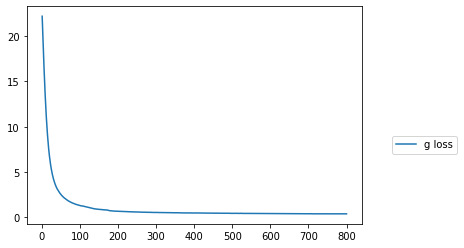

PR AUC: 1.00


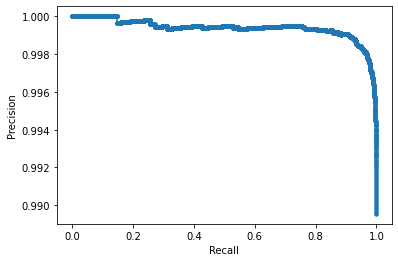

AUC: 1.00
Iteration: 2
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.028 | g_loss: 0.3666
[INFO] Training phase... Elapsed time: 372 seconds



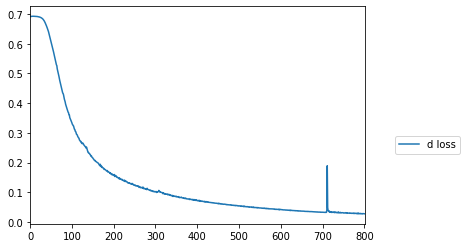

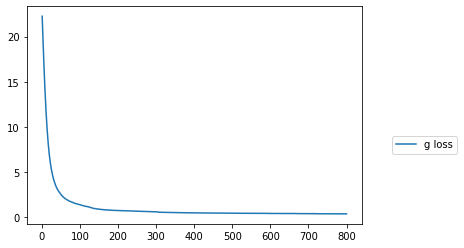

PR AUC: 1.00


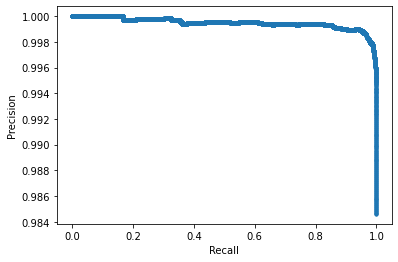

AUC: 1.00
Iteration: 3
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.028 | g_loss: 0.3758
[INFO] Training phase... Elapsed time: 371 seconds



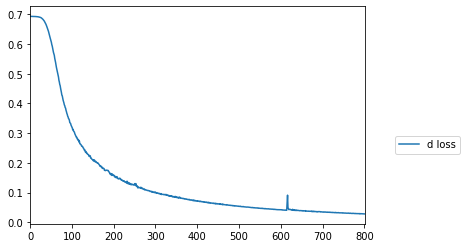

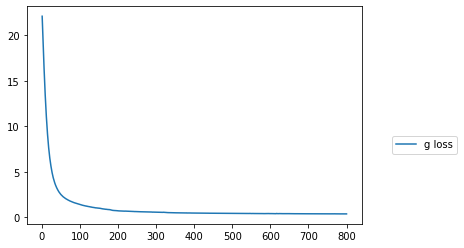

PR AUC: 1.00


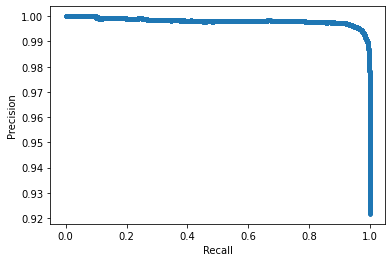

AUC: 0.99
Iteration: 4
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.035 | g_loss: 0.3863
[INFO] Training phase... Elapsed time: 366 seconds



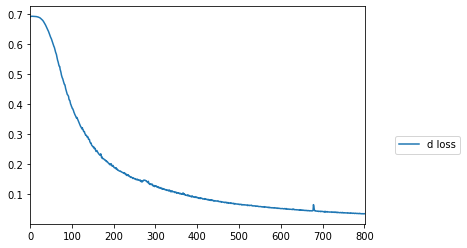

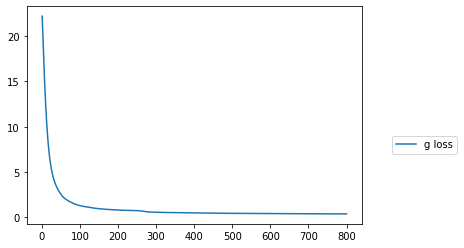

PR AUC: 1.00


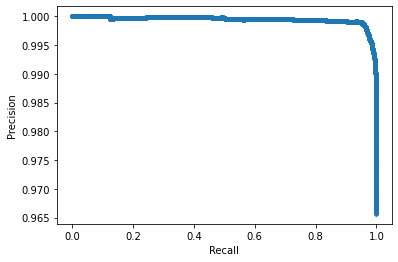

AUC: 1.00
Iteration: 5
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.025 | g_loss: 0.3755
[INFO] Training phase... Elapsed time: 350 seconds



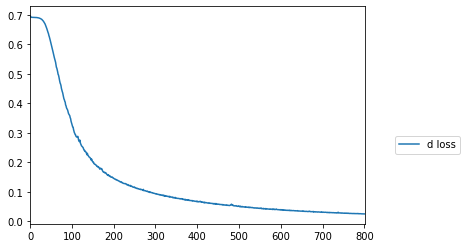

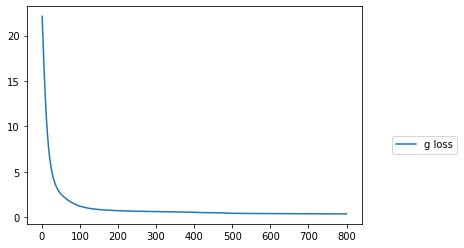

PR AUC: 1.00


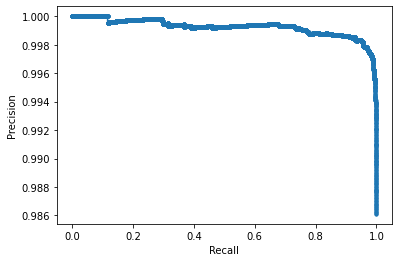

AUC: 1.00
Iteration: 6
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.029 | g_loss: 0.3696
[INFO] Training phase... Elapsed time: 366 seconds



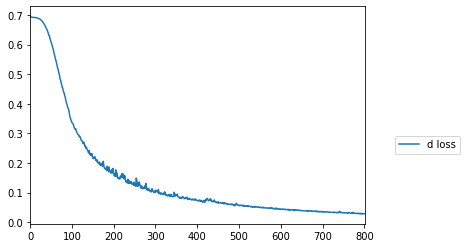

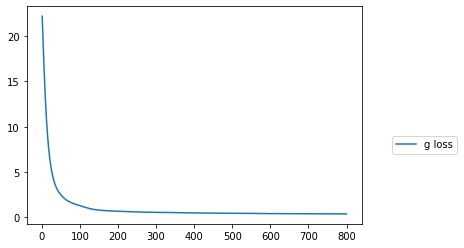

PR AUC: 1.00


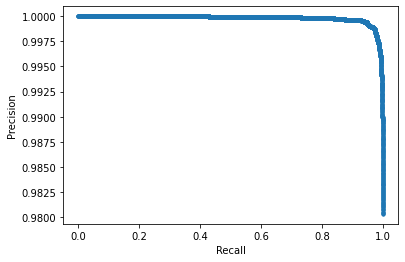

AUC: 1.00
Iteration: 7
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.028 | g_loss: 0.3815
[INFO] Training phase... Elapsed time: 369 seconds



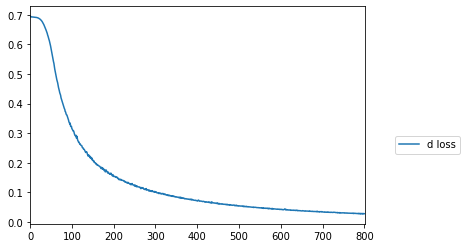

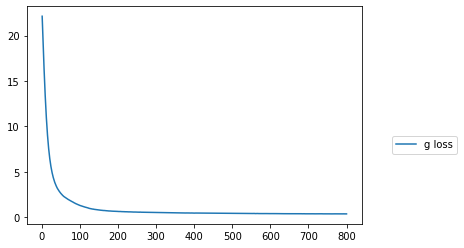

PR AUC: 1.00


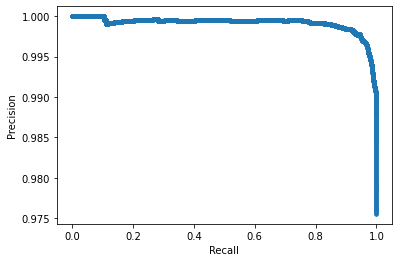

AUC: 1.00
Iteration: 8
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.029 | g_loss: 0.3784
[INFO] Training phase... Elapsed time: 369 seconds



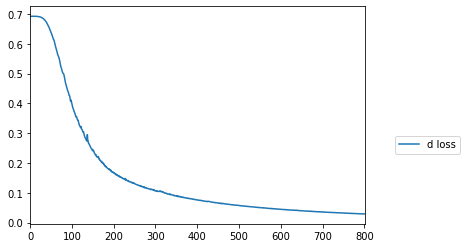

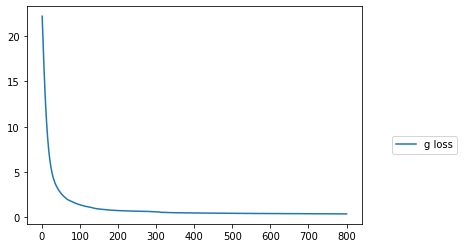

PR AUC: 1.00


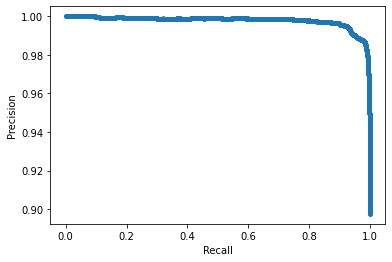

AUC: 0.99
Iteration: 9
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.026 | g_loss: 0.3731
[INFO] Training phase... Elapsed time: 371 seconds



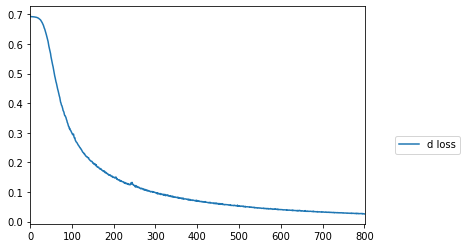

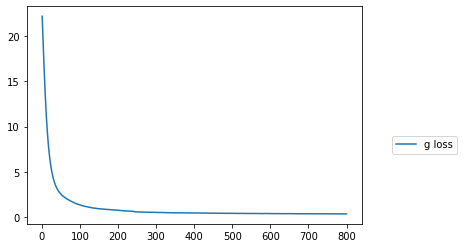

PR AUC: 1.00


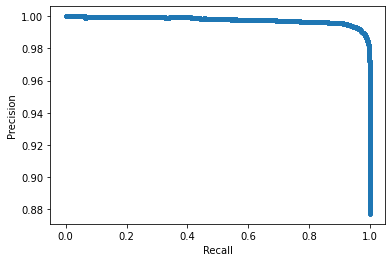

AUC: 0.99
Iteration: 11
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.030 | g_loss: 0.3845
[INFO] Training phase... Elapsed time: 364 seconds



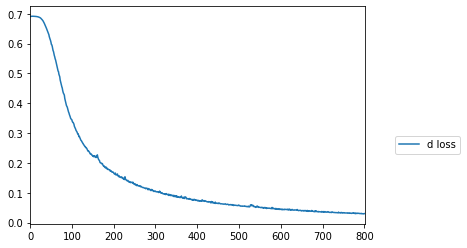

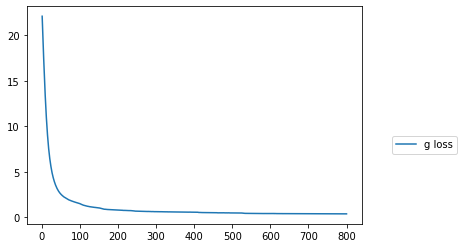

PR AUC: 1.00


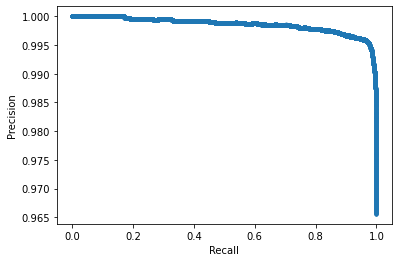

AUC: 0.99
Iteration: 12
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.026 | g_loss: 0.3821
[INFO] Training phase... Elapsed time: 357 seconds



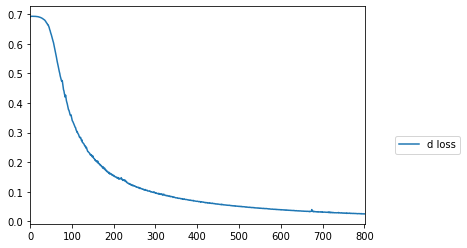

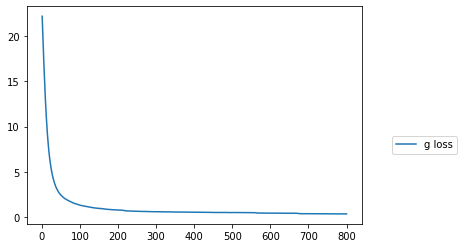

PR AUC: 1.00


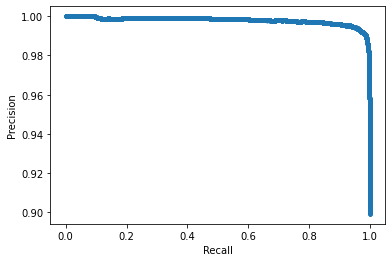

AUC: 0.99
Iteration: 13
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.041 | g_loss: 0.2891
[INFO] Training phase... Elapsed time: 360 seconds



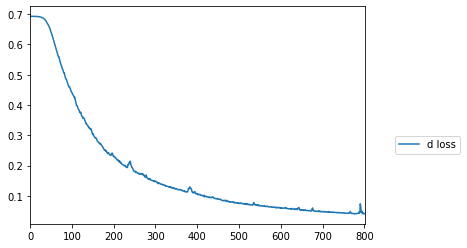

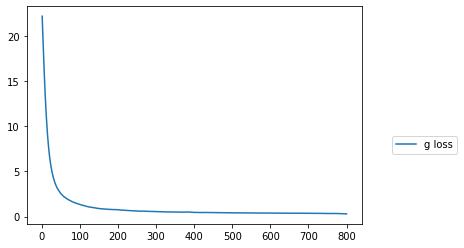

PR AUC: 1.00


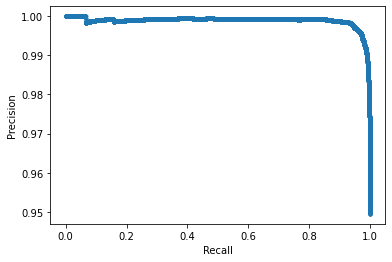

AUC: 0.99
Iteration: 14
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.027 | g_loss: 0.4191
[INFO] Training phase... Elapsed time: 360 seconds



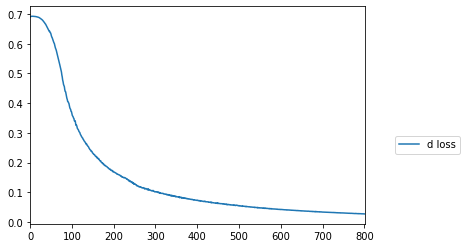

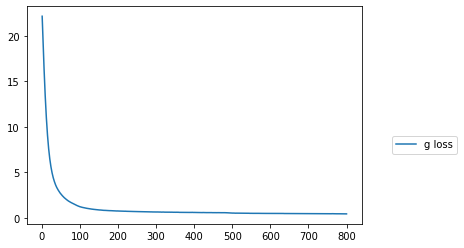

PR AUC: 1.00


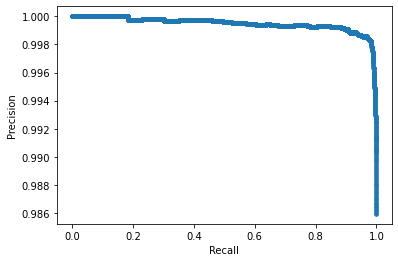

AUC: 1.00
Iteration: 15
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.029 | g_loss: 0.3847
[INFO] Training phase... Elapsed time: 367 seconds



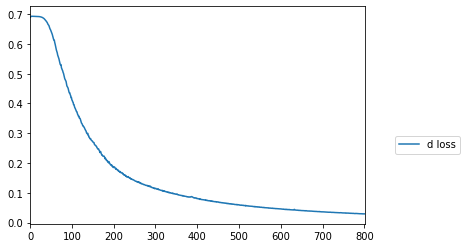

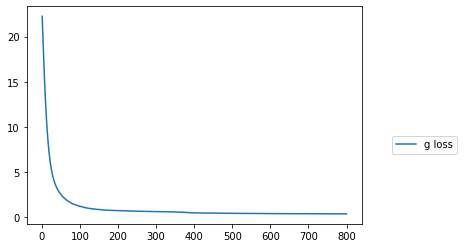

PR AUC: 1.00


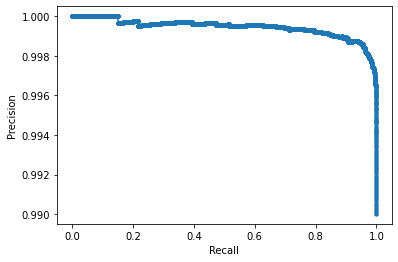

AUC: 1.00
Iteration: 16
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.032 | g_loss: 0.3805
[INFO] Training phase... Elapsed time: 358 seconds



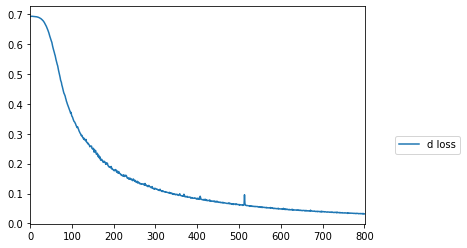

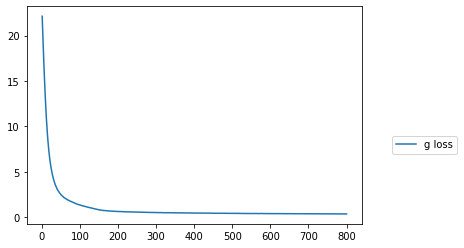

PR AUC: 1.00


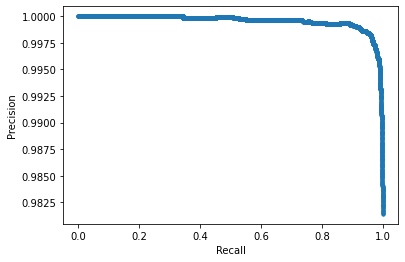

AUC: 1.00
Iteration: 17
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.029 | g_loss: 0.3710
[INFO] Training phase... Elapsed time: 351 seconds



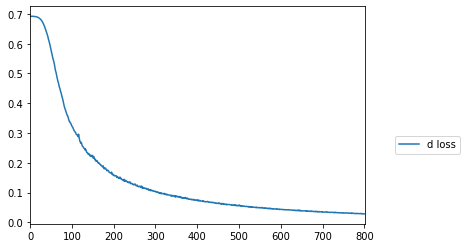

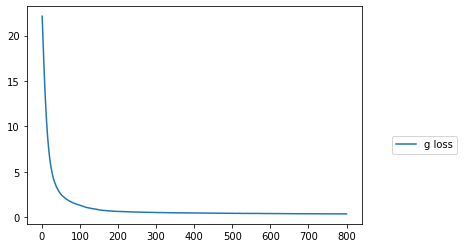

PR AUC: 1.00


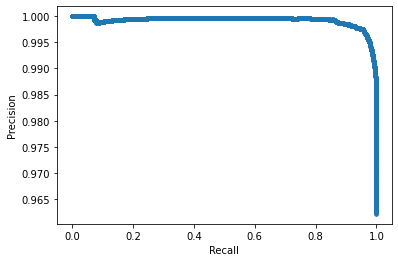

AUC: 1.00
Iteration: 18
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.030 | g_loss: 0.3856
[INFO] Training phase... Elapsed time: 350 seconds



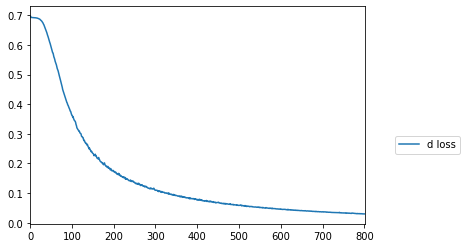

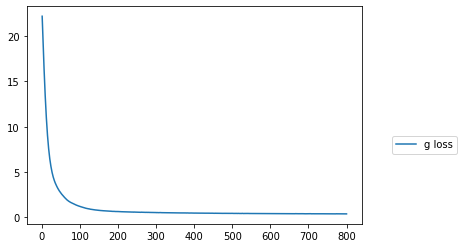

PR AUC: 1.00


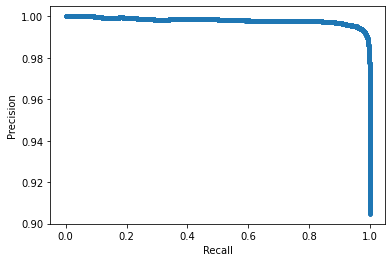

AUC: 0.99
Iteration: 19
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.026 | g_loss: 0.3826
[INFO] Training phase... Elapsed time: 350 seconds



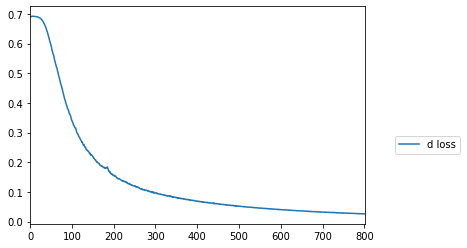

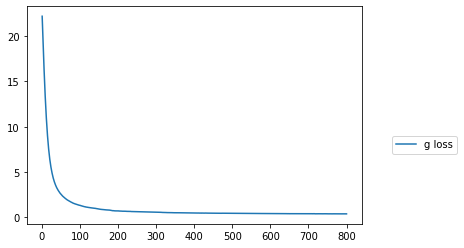

PR AUC: 1.00


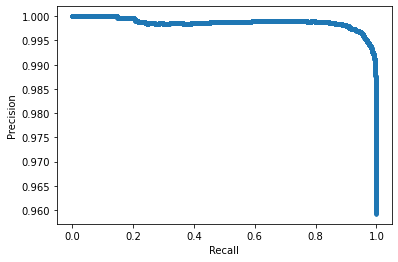

AUC: 0.99
Iteration: 20
[INFO] Starting training phase...

Epoch [800/800] | d_loss: 0.028 | g_loss: 0.4118
[INFO] Training phase... Elapsed time: 351 seconds



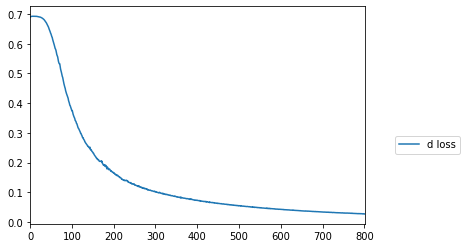

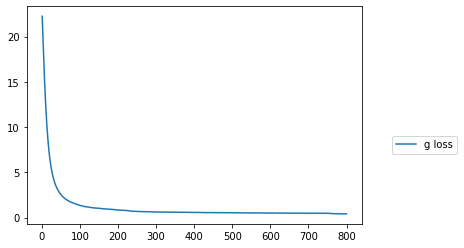

PR AUC: 1.00


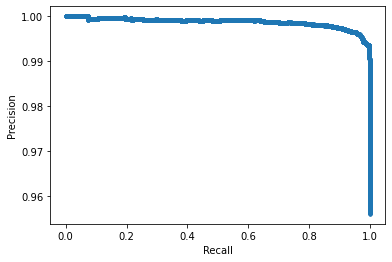

AUC: 0.99


In [6]:
n_runs = 20
auc_list = []
n_epochs = 800
seed = 42
pr_list = []

for i in range(n_runs):
    print(f'Iteration: {i+1}')
    dataset = get_DoH(PATH_B, PATH_M, seed*(i+1), show=False)
    
    # Convert Normal Label in 0 and Anomalous in 1
    dataset['y_test'].replace({1:0, 0:1}, inplace = True)
    
    train_dataset = torch.utils.data.TensorDataset(torch.tensor(dataset['x_train']).to(device), 
                                              torch.tensor(dataset['y_train'].to_numpy()).to(device))
    
    train_loader = DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True, drop_last = True)

    val_dataset = torch.utils.data.TensorDataset(torch.tensor(dataset['x_val']).to(device), 
                                              torch.tensor(dataset['y_val'].to_numpy()).to(device))
    val_loader = DataLoader(dataset=val_dataset, batch_size = batch_size, shuffle=False)

    test_dataset = torch.utils.data.TensorDataset(torch.tensor(dataset['x_test']).to(device), 
                                              torch.tensor(dataset['y_test'].to_numpy()).to(device))
    test_loader = DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle=False)
    
    ganomaly = GANomaly(nc, nz, device)
    
    _auc, pr_auc = ganomaly.train_and_test(train_loader, test_loader, args, n_epochs, batch_size)
    
    print(f'AUC: {_auc:.2f}')
    auc_list.append(_auc)
    pr_list.append(pr_auc)

In [7]:
meanAUC_PRAUC(auc_list, pr_list, 'GANomaly_DoH')

AUC:
[0.9972295249998933, 0.9976632728105417, 0.9917706111222301, 0.9972130171836846, 0.9965719606604548, 0.9987953964496664, 0.9960774985747414, 0.988471167491321, 0.9974980150204243, 0.9885896052347057, 0.9931431848459756, 0.989689710176995, 0.9949522008008609, 0.997505685137422, 0.997506403649553, 0.9974853153185099, 0.9964499213750135, 0.9910098325151815, 0.9941690046153266, 0.994228551308179]
**************
PR AUC:
[0.9993715298529611, 0.9994818243555469, 0.9981030578303915, 0.9994303544696541, 0.9992308267886245, 0.9997874027131118, 0.9991436596694738, 0.9976861666455502, 0.9995256113468157, 0.9976478927981615, 0.9985633248293623, 0.9978082904898911, 0.9988380507559622, 0.9994718367358633, 0.9994462701494383, 0.9995363555832142, 0.9992217192918296, 0.9979768170270195, 0.9986529896768703, 0.9987193087012036]
**************
AUC
0.99 +/- 0.00
95% confidence level, average auc would be between 0.99 and 1.00
**************
PR AUC
1.00 +/- 0.00
95% confidence level, average auc would b

---